In [67]:
import os, zipfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### load data
df_calendar = pd.read_csv('/Users/reinaldodeoliveiramaciel/Desktop/Kaggle/M5/data/m5-forecasting-accuracy/calendar.csv')
df_sales_train = pd.read_csv('/Users/reinaldodeoliveiramaciel/Desktop/Kaggle/M5/data/m5-forecasting-accuracy/sales_train_validation.csv')
df_sample_sub = pd.read_csv('/Users/reinaldodeoliveiramaciel/Desktop/Kaggle/M5/data/m5-forecasting-accuracy/sample_submission.csv')
df_sell_prices = pd.read_csv('/Users/reinaldodeoliveiramaciel/Desktop/Kaggle/M5/data/m5-forecasting-accuracy/sell_prices.csv')


<center><b>Dataframes data<b></center>

**calendar.csv** - Contains information about the dates on which the products are sold.

**sales_train_validation.csv** - Contains the historical daily unit sales data per product and store [d_1 - d_1913]

**sample_submission.csv** - The correct format for submissions. Reference the Evaluation tab for more info.

**sell_prices.csv** - Contains information about the price of the products sold per store and date.

<br>

<center><b>Submission File<b></center>

Each row contains an id that is a concatenation of an item_id and a store_id, which is either validation (corresponding to the Public leaderboard), or evaluation (corresponding to the Private leaderboard). You are predicting 28 forecast days (F1-F28) of items sold for each row. For the validation rows, this corresponds to d_1914 - d_1941, and for the evaluation rows, this corresponds to d_1942 - d_1969. (Note: a month before the competition close, the ground truth for the validation rows will be provided.)

In [3]:
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
df_sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [5]:
df_sample_sub.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


<center><b>Relationships</b></center>
<br>

**df_calendar** --> **df_sell_prices** by [wm_yr_wk] = [wm_yr_wk]
<br>
**df_sell_prices** --> **df_sales_train** by [item_id + store_id + '_validation'] = [id]
<br>

## Descriptive Analysis

### 1 - Check for duplicates

In [17]:
sum(df_sell_prices.duplicated())

0

In [18]:
### Check for duplicates on df_sales_train
sum(df_sales_train.duplicated())

0

In [19]:
### Check for duplicates on df_calendar
sum(df_calendar.duplicated())

0

### 2 - Data Type Inventory

In [20]:
df_sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


Data type looks good for df_sell_prices

In [21]:
df_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [22]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 215.4+ KB


All data looks nice from the data type perspective.

### 3- Visualization and Understanding

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12058fa20>]],
      dtype=object)

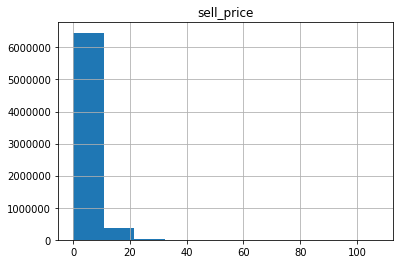

In [25]:
#Distribution of df_sell_prices

df_sell_prices.hist('sell_price')

<font color='orange'> Sell price have much itens that costs less than 10$ </font>

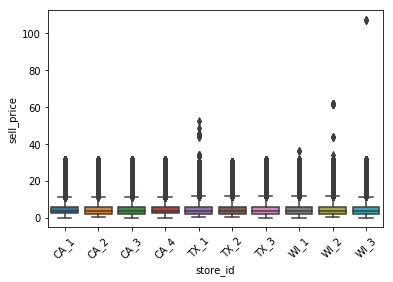

In [34]:
ax = sns.boxplot(x='store_id', y='sell_price', data=df_sell_prices)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<font color='orange'> Along stores, prices doesn`t look to change too much. So far, we know that we have available 10 different stores </font>

In [41]:
df_sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [45]:
df_sales_train.store_id.value_counts()

CA_2    3049
TX_1    3049
TX_3    3049
CA_3    3049
CA_4    3049
WI_2    3049
TX_2    3049
CA_1    3049
WI_3    3049
WI_1    3049
Name: store_id, dtype: int64

In [46]:
df_sales_train.cat_id.value_counts()

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

### Cheking for time series behavior

In [58]:
df_foods = df_sales_train.query('cat_id=="FOODS"')
df_household = df_sales_train.query('cat_id=="HOUSEHOLD"')
df_hobbies = df_sales_train.query('cat_id=="HOBBIES"')

In [60]:
df_foods = df_foods.melt(id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                         var_name='Dia',
                        value_name = 'Vendas')

In [61]:
df_foods.head()

,id,item_id,dept_id,cat_id,store_id,state_id,Dia,Vendas
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3
1,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,d_1,0
2,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,d_1,0
3,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,d_1,0
4,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,d_1,3


In [62]:
df_foods.id.value_counts()

FOODS_3_016_WI_2_validation    1913
FOODS_3_282_TX_2_validation    1913
FOODS_2_340_WI_1_validation    1913
FOODS_3_543_WI_2_validation    1913
FOODS_3_337_TX_3_validation    1913
FOODS_3_269_CA_2_validation    1913
FOODS_1_037_TX_2_validation    1913
FOODS_3_185_WI_1_validation    1913
FOODS_2_242_TX_3_validation    1913
FOODS_1_072_WI_3_validation    1913
FOODS_3_439_TX_3_validation    1913
FOODS_3_498_WI_3_validation    1913
FOODS_3_778_WI_3_validation    1913
FOODS_3_567_TX_3_validation    1913
FOODS_3_462_WI_2_validation    1913
FOODS_3_163_CA_2_validation    1913
FOODS_3_192_TX_2_validation    1913
FOODS_3_756_TX_1_validation    1913
FOODS_3_767_CA_3_validation    1913
FOODS_3_330_CA_2_validation    1913
FOODS_3_661_WI_3_validation    1913
FOODS_3_552_CA_3_validation    1913
FOODS_3_429_WI_1_validation    1913
FOODS_3_573_CA_3_validation    1913
FOODS_3_124_CA_2_validation    1913
FOODS_1_037_CA_2_validation    1913
FOODS_2_253_WI_2_validation    1913
FOODS_2_099_TX_3_validation 

In [63]:
df_FOODS_1_001_CA_1_validation = df_foods.query('id=="FOODS_1_001_CA_1_validation"')

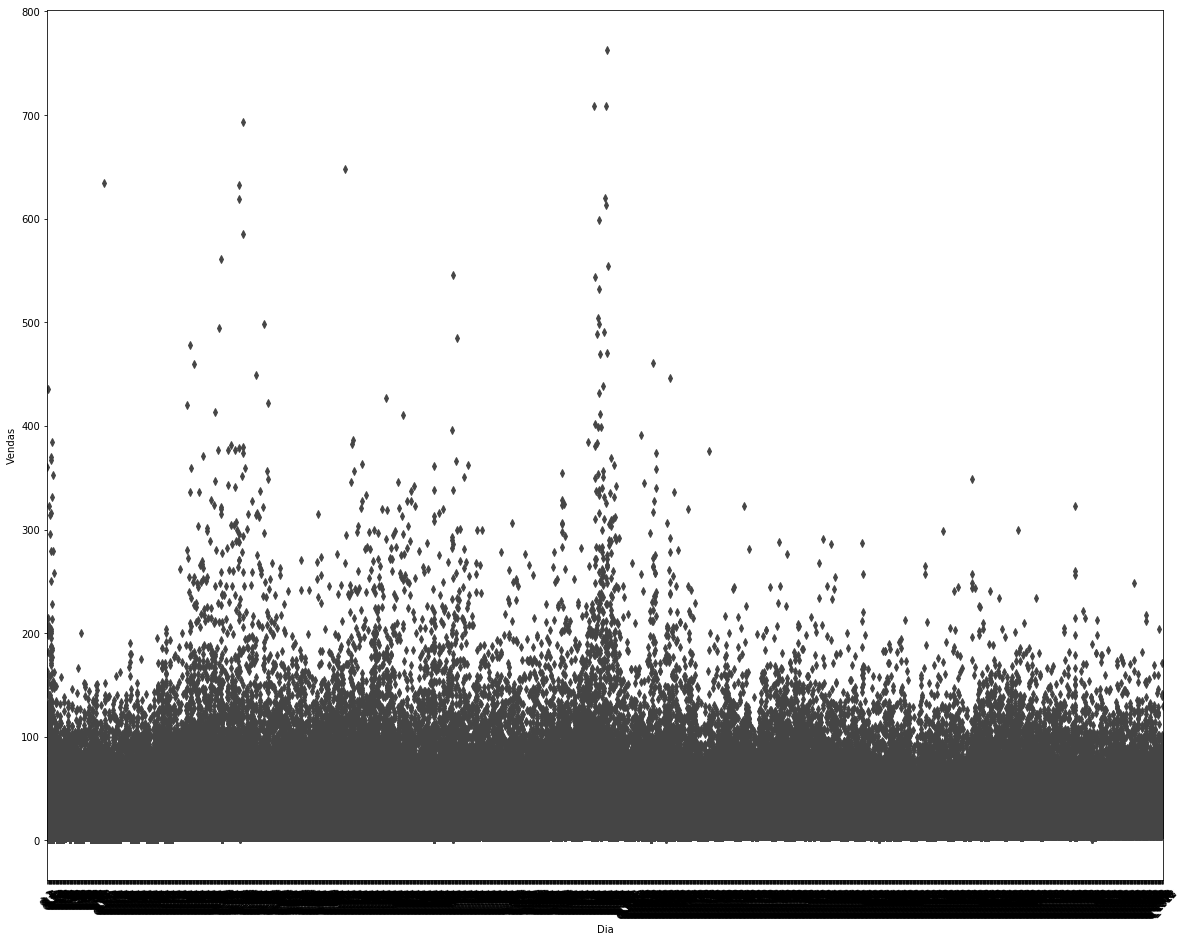

In [71]:
plt.subplots(figsize=(20,16))
ax = sns.boxplot(x='Dia',y='Vendas', data=df_foods)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)